```markdown
# Anvendt Programmering 5
---
## Machine Learning Basics with Scikit-Learn and Python




# Introduction

- Welcome to the lecture on Machine Learning Basics with Scikit-Learn and Python.
- Objectives:
  - Understand basic machine learning concepts
  - Learn how to use scikit-learn for machine learning tasks
  - Complete two hands-on exercises

---



# Setting Up Your Environment

- Install packages using pip:

```bash
pip install jupyter
pip install scikit-learn
pip install matplotlib
pip install seaborn
pip install pandas
pip install seaborn
```


In [2]:
%pip install scikit-learn matplotlib seaborn pandas jupyter

Note: you may need to restart the kernel to use updated packages.



# Understanding the Basics

- **Supervised Learning**: Training a model on labeled data (e.g., classification, regression).
- **Unsupervised Learning**: Training a model on unlabeled data (e.g., clustering, dimensionality reduction).

---


# Unsupervised Learning

A type of machine learning where the algorithm learns patterns from unlabeled data.
- **Key Methods**:
  - Clustering
  - Dimensionality Reduction
- **Applications**:
  - Customer segmentation
  - Anomaly detection
  - Image compression
  

# What is K-means Clustering?

**K-means Clustering**: A method to partition data into K clusters, where each data point belongs to the cluster with the nearest mean.

- **Steps**:
  1. **Cluster Assignment Step (E-Step)**  Each data point $x_i$ is assigned to the nearest cluster centroid:
    $$
    C_k = \{ x_i \mid \arg\min_{K} \| x_i - \mu_k \|^2 \}
    $$
  2. **Centroid Update Step (M-Step)**: The centroid of each cluster is updated as the mean of all points assigned to it:
    $$
    \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
    $$
  3. **Objective Function (Minimization of Within-Cluster Variance)**: The K-Means algorithm minimizes the following objective function:
    $$
    J = \sum_{j=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
    $$
  4. **Continue until Convergence**: The algorithm iterates between the assignment step and the update step until convergence (i.e., when centroids no longer change significantly or a stopping criterion is met).


# Visualizing K-means Clustering

- Data points grouped into 4 clusters.
- Feature is just a measurement of a specific sample

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

plt.style.use("ggplot")

N_CLUSTERS = 2
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=N_CLUSTERS, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=["x", "y"])

df.head()

,x,y
0,2.406157,4.870475
1,2.580767,0.828599
2,1.062696,5.176351
3,2.548219,0.900839
4,1.390161,5.084895


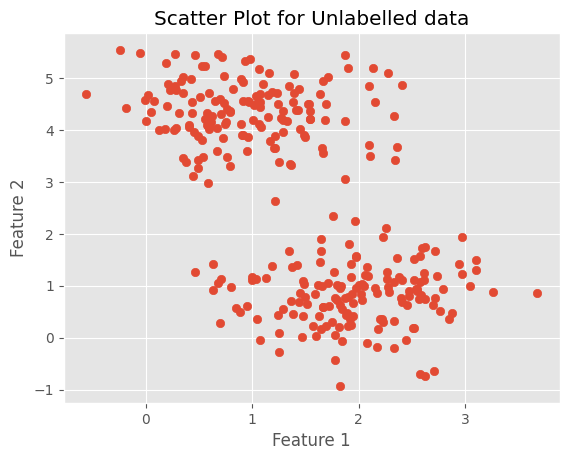

In [4]:
# Visualization of the data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Scatter Plot for Unlabelled data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## K-means Clustering


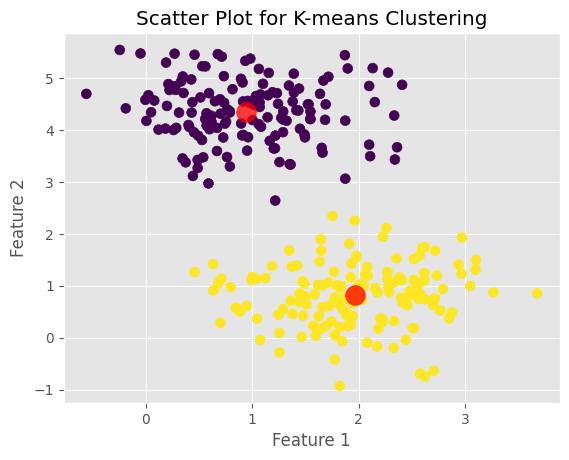

In [5]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualization of the Clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.75)
plt.title("Scatter Plot for K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# KMeans on breastcancer patients

## Load data

In [6]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target


# Display the dataframe
df_all = pd.DataFrame(X, columns=data.feature_names)

df_all["Target"] = y
df_all["Target"] = df_all["Target"].map({i: v for i, v in enumerate(data.target_names)})
df_all.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant




# Splitting Data into training and test datasets

Improves evaluation of a model's performance on unseen data
- Robust

**Data can be split into Training, Test**
- Generally a good split is:
    - Training:80\%
    - Test 20\% 
    - At some point you will also get to worry about validation, however, we will skip this for now!


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Normalize X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the dataframe
df_test = pd.DataFrame(X_test, columns=data.feature_names)

df_test["Target"] = y_test
df_test["Target"] = df_test["Target"].map({i: v for i, v in enumerate(data.target_names)})

df_test.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
23,10.03,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.06439,...,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061,benign
13,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.079810,0.1869,0.06532,...,25.21,113.70,975.2,0.1426,0.21160,0.33440,0.10470,0.2736,0.07953,malignant
106,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082,benign
30,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.022570,0.2030,0.06552,...,28.26,77.80,436.6,0.1087,0.17820,0.15640,0.06413,0.3169,0.08032,benign
66,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.094790,0.2096,0.07331,...,30.50,130.30,1272.0,0.1855,0.49250,0.73560,0.20340,0.3274,0.12520,malignant
0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.038210,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.23780,0.26710,0.10150,0.3014,0.08750,benign
71,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.066060,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480,malignant
111,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.029290,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.15820,0.18040,0.09608,0.2664,0.07809,benign
99,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.057360,0.1467,0.05407,...,35.46,132.80,1284.0,0.1436,0.41220,0.50360,0.17390,0.2500,0.07944,malignant
65,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.020360,0.1514,0.06019,...,31.31,90.67,624.0,0.1227,0.34540,0.39110,0.11800,0.2826,0.09585,benign


## Visualize Breast Cancer Dataset

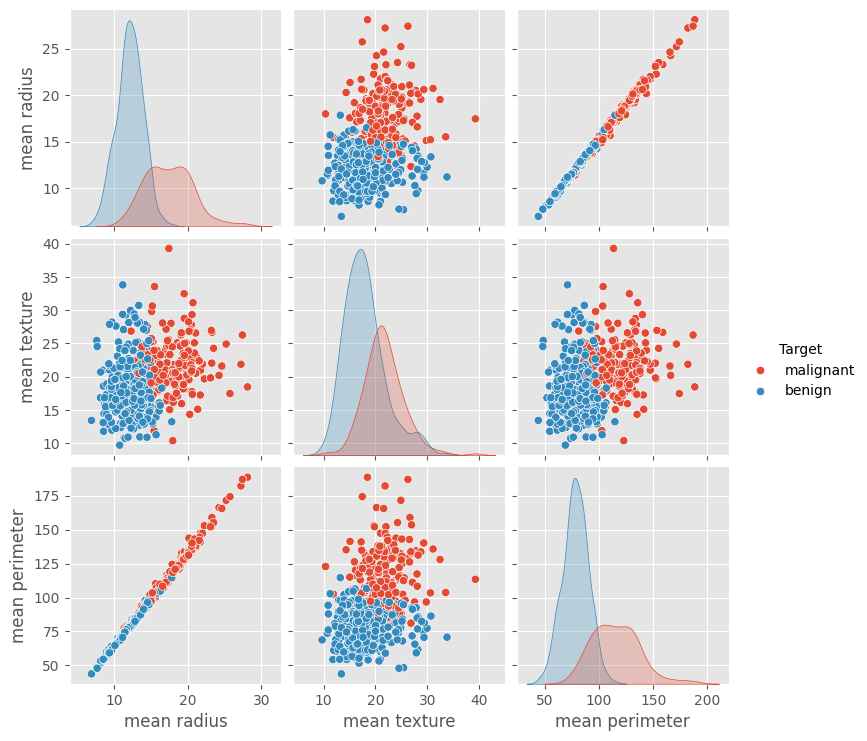

In [8]:
import seaborn as sns

sns.pairplot(df_all, hue="Target", vars=data.feature_names[:3])
plt.show()

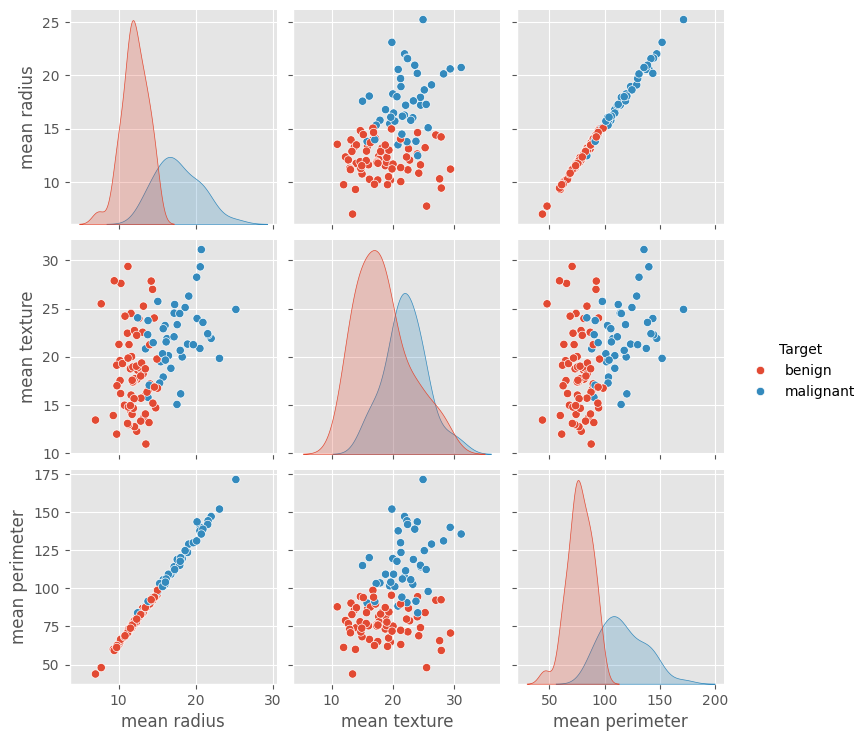

In [9]:
import seaborn as sns

sns.pairplot(df_test, hue="Target", vars=data.feature_names[:3])
plt.show()

# Performance of a Model

!["acc.png"](acc.png)

# Running and validating KMeans in python

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Apply K-means clusteriang
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(X_train_scaled)
y_kmeans = kmeans.predict(X_test_scaled)

# Map cluster labels to original labels (0: benign, 1: malignant)
mapping = (
    {0: 1, 1: 0}
    if confusion_matrix(y_test, y_kmeans)[0][0] < confusion_matrix(y_test, y_kmeans)[1][0]
    else {0: 0, 1: 1}
)
y_kmeans_mapped = [mapping[label] for label in y_kmeans]

# Evaluate the clustering performance
accuracy_Kmeans = accuracy_score(y_test, y_kmeans_mapped)
conf_matrix_Kmeans = confusion_matrix(y_test, y_kmeans_mapped)

# Print the results
print(f"KMeans Accuracy using {len(data.feature_names)} features: {accuracy_Kmeans * 100:.1f}%")
print(f"KMeans Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix_Kmeans)


KMeans Accuracy using 30 features: 93.0%
KMeans Confusion Matrix using 30 features:
[[36  7]
 [ 1 70]]


# Accuracy visualized
!["acc2.png"](acc2.png)

# Visualize the clusters

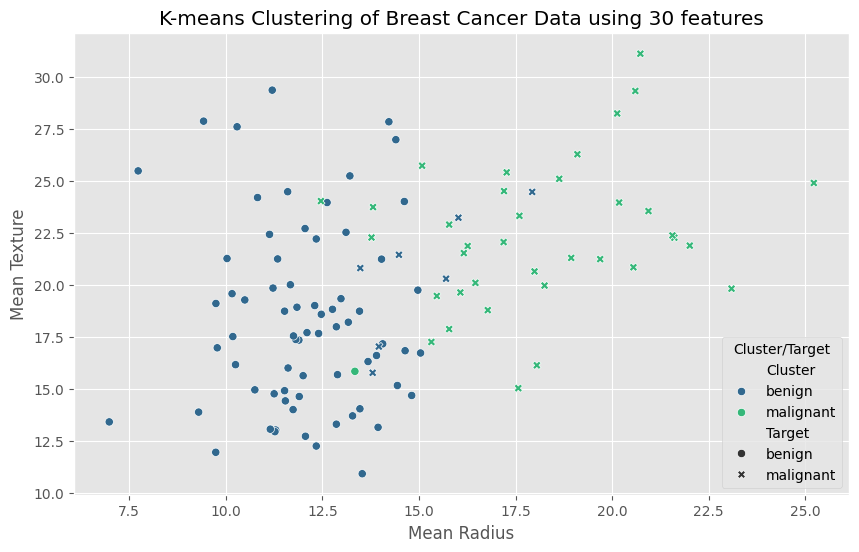

In [11]:
df_test["Cluster"] = y_kmeans_mapped
df_test["Cluster"] = df_test["Cluster"].map({i: v for i, v in enumerate(data.target_names)})


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_test, x="mean radius", y="mean texture", hue="Cluster", style="Target", palette="viridis")
plt.title(f"K-means Clustering of Breast Cancer Data using {len(data.feature_names)} features")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend(title="Cluster/Target")
plt.show()

# Exercise

- What is the accuracy of KMeans if we use 1 feature?
- Use the following code as the starting point
- Data should be fitted using the training data, and verified using test data

- What will happen to the accuracy

In [12]:
# get first feature of X, and do KMeans clustering
X_train_scaled1 = X_train_scaled[:, :1]  # 1 feature only
X_test_scaled1 = X_test_scaled[:, :1]  # 1 feature only
# y_test is the label variable, for the test set! the label doesn't change!


# Answer

In [13]:
# Apply K-means clustering and predict the labels
print("Applt K-means clustering after this print!!!!")
kmeans.fit(X_train_scaled1)
y_kmeans1 = kmeans.predict(X_test_scaled1)


# Map cluster labels to original labels (0: benign, 1: malignant)
mapping = (
    {0: 1, 1: 0}
    if confusion_matrix(y_test, y_kmeans1)[0][0] < confusion_matrix(y_test, y_kmeans1)[1][0]
    else {0: 0, 1: 1}
)
y_kmeans1_mapped = [mapping[label] for label in y_kmeans1]

# Evaluate the clustering performance
print("Evaluate the clustering performance")
accuracy_Kmeans1 = accuracy_score(y_test, y_kmeans1_mapped)
conf_matrix_Kmeans1 = confusion_matrix(y_test, y_kmeans1_mapped)

# Print the results
print(f"KMeans Accuracy using {1} features: {accuracy_Kmeans1 * 100:.1f}%")
print(f"KMeans Confusion Matrix using {1} features:")
print(conf_matrix_Kmeans1)

Applt K-means clustering after this print!!!!
Evaluate the clustering performance
KMeans Accuracy using 1 features: 88.6%
KMeans Confusion Matrix using 1 features:
[[30 13]
 [ 0 71]]


# Supervised Learning

**Why Train the Model?**

- Training the model involves learning patterns from the training data, which the model uses to make predictions.



## K Nearest Neighbors

- Lazy Learner
- K: How many neighbors, should be considered, to find the closet fit
    - Basically, if K = 3, then we find the three closest samples to a given sample, and pick the majority


## 
1. The k-nearest neighbor algorithm is imported from the scikit-learn package.
2. Create feature and target variables. 
3. Split data into training and test data.
4. Generate a k-NN model using neighbors value.
5. Train or fit the data into the model.
6. Predict the future.

# K Nearest Neighbors

1. **Distance Calculation**: To find the nearest neighbors, KNN typically uses **Euclidean distance** between a query point \( x \) and a training point \( x_i \):
    $$
    d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2}
    $$
2. **Majority Voting for Classification**: For classification, the predicted class $\hat{y}$ is determined by majority voting among the $K$ nearest neighbors:
    $$
    \hat{y} = \arg\max_{c} \sum_{i \in N_K(x)} \mathbb{1}(y_i = c)
    $$
    - $N_k(x)$ represents the set of the $k$ nearest neighbors of $x$,
    - $y_i$ is the class label of neighbor $x_i$,
    - $\mathbb{1}(y_i = c)$ is an indicator function that equals 1 if $y_i = c$, otherwise 0,
    - $\arg\max_c$ selects the class with the highest count.

3. **Weighted Voting (Optional)**: A weight can be atributed to each sample. However, we skip this for now

4. **Regression with KNN**: For regression, the predicted value $\hat{y}$ is the average of the target values of the $k$ nearest neighbors
    $$
    \hat{y} = \frac{1}{k} \sum_{i \in N_k(x)} y_i
    $$
    where:
    - $y_i$ is the target value of neighbor $x_i$,
    - $w_i$ is the weight based on distance.


# K Nearest Neighbors

!["knn.png"](knn.png)

# K Nearest Neighbors


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
# Evaluate the clustering performance
accuracy_knn = knn.score(X_test_scaled, y_test)
conf_matrix_knn = confusion_matrix(y_test, y_knn)

# Print the results
print(f"KNN Accuracy using {len(data.feature_names)} features: {accuracy_knn * 100:.1f}%")
print(f"KNN Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix_knn)

KNN Accuracy using 30 features: 94.7%
KNN Confusion Matrix using 30 features:
[[40  3]
 [ 3 68]]


# Exercise

- What is the accuracy of K Nearest Neighbors if we use 1, 7 nearest neighbors?
- Data should be fitted using the training data, and verified using test data

- What do you expect will happen to the accuracy
- How will the accuracy be compared to KMeans?

- Use the following code as the starting point

In [15]:
# get first feature of X, and do KMeans clustering
#X_train_scaled
#X_test_scaled
# y_train, y_test are the label variables. the label doesn't change!


# Apply KNN  and predict the labels
print("Applt KNN clustering after this print!!!!")

Applt KNN clustering after this print!!!!


# Answer


In [ ]:
# Apply KNN  and predict the labels
print("Applt KNN clustering after this print!!!!")

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train_scaled, y_train)
y_knn1 = knn1.predict(X_test_scaled)
accuracy_knn1 = knn1.score(X_test_scaled, y_test)
conf_matrix_knn1 = confusion_matrix(y_test, y_knn1)


knn7 = KNeighborsClassifier(7)
knn7.fit(X_train_scaled, y_train)
y_knn7 = knn7.predict(X_test_scaled)
accuracy_knn7 = knn7.score(X_test_scaled, y_test)
conf_matrix_knn7 = confusion_matrix(y_test, y_knn7)

# Print the results
print(f"KNN, with 1 NN, Accuracy using {len(data.feature_names)} features: {accuracy_knn1 * 100:.1f}%")
print(f"KNN, with 1 NN, Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix_knn1)


# Print the results
print(f"KNN, with 7 NN, Accuracy using {len(data.feature_names)} features: {accuracy_knn7 * 100:.1f}%")
print(f"KNN, with 7 NN, Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix_knn7)

Applt KNN clustering after this print!!!!
KNN, with 1 NN, Accuracy using 30 features: 93.9%
KNN, with 1 NN, Confusion Matrix using 30 features:
[[39  4]
 [ 3 68]]
KNN, with 7 NN, Accuracy using 30 features: 94.7%
KNN, with 7 NN, Confusion Matrix using 30 features:
[[40  3]
 [ 3 68]]


# Support Vector Machines (SVM's)

Support Vector Machine tries to find the best separating line between classes.

**The advantages of support vector machines are:**
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. 

**The disadvantages of support vector machines include:**
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


## How SVM Works
- SVM finds the best hyperplane that separates the data into different classes while maximizing the margin.

!["svm.png"](svm.png)


# Support Vector Machine (SVM)

!["SVM_margin.png"](SVM_margin.png)

# Example using Breast Cancer

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

y_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test,y_clf)
conf_matrix_clf = confusion_matrix(y_test,y_clf)


# Print the results
print(f"SVM Accuracy using {len(data.feature_names)} features: {accuracy_knn1 * 100:.1f}%")
print(f"SVM Confusion Matrix using {len(data.feature_names)} features:")
print(conf_matrix_knn1)


---

# Improving the Model

**Why Improve the Model?**
- Improving the model can lead to better performance and more accurate predictions.
- Experiment with different models, hyperparameters, and feature engineering to improve performance.

**Examples:**
- Hyperparameter Tuning: Adjusting parameters like max_depth for Decision Trees.
- Feature Engineering: Creating new features from existing data.

- You will not be doing this, this is far beond this course!

# Exercises


## Exercise 1 - Classification with Breast Cancer Dataset

**Objective**: Train a classifier on the Breast Cancer dataset and evaluate its performance.
Steps:
1. Load the Breast Cancer dataset.
2. Split the data into training and testing sets.
3. Train a Decision Tree classifier using one feature.
4. Train a Decision Tree classifier using multiple features.
5. Make predictions and evaluate accuracy.



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with one feature
X_train_one_feature = X_train[:, [0]]  # Using 'mean radius'
X_test_one_feature = X_test[:, [0]]
model = DecisionTreeClassifier()
model.fit(X_train_one_feature, y_train)

# Make predictions with one feature
y_pred_one_feature = model.predict(X_test_one_feature)

# Evaluate model with one feature
accuracy_one_feature = accuracy_score(y_test, y_pred_one_feature)
print(f"Accuracy with one feature: {accuracy_one_feature}")

# Train model with multiple features
model.fit(X_train, y_train)

# Make predictions with multiple features
y_pred = model.predict(X_test)

# Evaluate model with multiple features
accuracy_Kmeans = accuracy_score(y_test, y_pred)
print(f"Accuracy with multiple features: {accuracy_Kmeans}")
